In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import pickle

In [2]:
file = open(r"C:\Users\rj100\OneDrive\Documents\metamorphosis.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The first line:" , lines[0])    
print("The last line:", lines[-1])

The first line: One morning, when Gregor Samsa woke from troubled dreams, he found

The last line: first to get up and stretch out her young body.



In [3]:
data = ""

for i in lines:
    data = ' '.join(lines)
    
data = data.replace('\n','').replace('\r','').replace('\ufeff','')    
data[:360]                    

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [4]:
import string

translator = str.maketrans(string.punctuation,' '*len(string.punctuation))

new_data = data.translate(translator)
new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [5]:
z = []
for i in data.split():
    if i not  in z:
        z.append(i)
        
data = ' '.join(z) 
data[:500]


'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [7]:
vocab_size  = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [8]:
sequences = []
for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequneces are : ", len(sequences))    
sequences = np.array(sequences)
sequences[:10]

The Length of sequneces are :  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)   
y = np.array(y)

In [10]:
print('The data is : ', X[:5])
print('The responses are :', y[:5])

The data is :  [ 17  53 293   2  18]
The responses are : [ 53 293   2  18 729]


In [11]:
y = to_categorical(y , num_classes = vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 10 ,input_length = 1))
model.add(LSTM(1000, return_sequences = True))
model.add(LSTM(1000))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(vocab_size, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             26170     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 2617)              2619617   
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


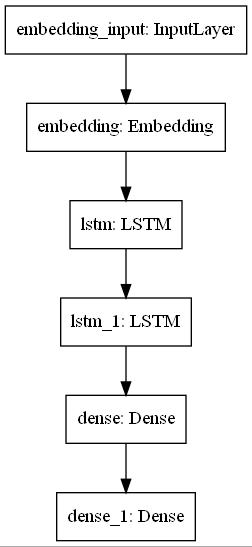

In [14]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file = 'model.jpg', show_layer_names = True)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard

In [16]:
checkpoint = ModelCheckpoint("nextword1.h5", monitor = 'loss',verbose = 1,
                            save_best_only = True, mode = 'auto')

reduce = ReduceLROnPlateau(monitor = 'loss',factor = 0.2, patience = 3, min_lr = 0.0001,  verbose = 1)



In [17]:
logdir = 'logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir = logdir)

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001))

In [19]:
model.fit(X,y,epochs =10, batch_size  = 64, callbacks = [checkpoint,reduce,tensorboard_Visualization])

Epoch 1/10
61/61 [==============================] - 43s 482ms/step - loss: 7.8721

Epoch 00001: loss improved from inf to 7.87526, saving model to nextword1.h5
Epoch 2/10
61/61 [==============================] - 31s 509ms/step - loss: 7.8621

Epoch 00002: loss improved from 7.87526 to 7.85918, saving model to nextword1.h5
Epoch 3/10
61/61 [==============================] - 33s 536ms/step - loss: 7.8115

Epoch 00003: loss improved from 7.85918 to 7.81786, saving model to nextword1.h5
Epoch 4/10
61/61 [==============================] - 32s 525ms/step - loss: 7.6336

Epoch 00004: loss improved from 7.81786 to 7.62623, saving model to nextword1.h5
Epoch 5/10
61/61 [==============================] - 29s 480ms/step - loss: 7.3879

Epoch 00005: loss improved from 7.62623 to 7.40921, saving model to nextword1.h5
Epoch 6/10
61/61 [==============================] - 24s 384ms/step - loss: 7.1835

Epoch 00006: loss improved from 7.40921 to 7.24430, saving model to nextword1.h5
Epoch 7/10
61/61 [==

In [21]:
from keras.preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen = vocab_size, truncating ='pre')

print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    pred_word = tokenizer.index_word[i]
    print('Next world suggestion:', pred_word)

how many people
[154, 748, 341] [[  0   0   0 ... 154 748 341]]
Next world suggestion: on
Next world suggestion: he'd
Next world suggestion: stick
